## Emerging Markets High Yield Corporate Bond Index Yield 

Using the Dicky-Fully test to reject the null hypothesis (prove the data is stationary). This is done by shapeing the data using log and EWMA analysis. This is a critical step in creating predictive models for the time series data set. 

In [15]:
import quandl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Panda will soon require an explicit registration of matplotlib converter (Done below)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

quandl.ApiConfig.api_key = 'N893mRXzwfPwTjjjCMwQ'

EM_HY_bond_yields = quandl.get('ML/EMHYY')
EM_HY_bond_yields = EM_HY_bond_yields.rename(index=str, columns={"BAMLEMHBHYCRPIEY": "yield"})



In [19]:
def dicky_fuller_results(data,title):
    print(title)
    dftest = adfuller(data, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-   value','#Lags Used','Number of Observations Used'])
    print(dfoutput)
    test_stat = dftest[0]
    critical_value = list(dftest[4].items())[1][1]
    print(f'Critical Value at 5% -> {critical_value}')
    if test_stat < critical_value:
        print('Reject null hypothesis, data is stationary')
    else:
        print('Do not reject null hypothesis, can not determine that data is stationary.')


Showing a quick representation of the raw data with a rolling mean

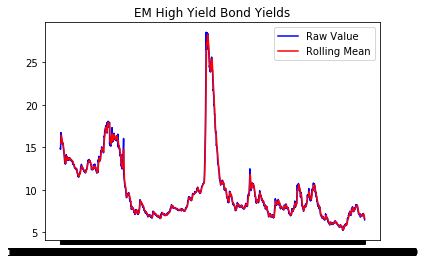

In [18]:

rollmean = EM_HY_bond_yields['yield'].rolling(12).mean()
plt.plot(EM_HY_bond_yields['yield'], color='blue', label='Raw Value')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.title('EM High Yield Bond Yields')
plt.legend(loc='best')
plt.show()

In [20]:
dicky_fuller_results(EM_HY_bond_yields['yield'], 'Dicky Fuller test results for raw yield data')

Dicky Fuller test results for raw yield data
Test Statistic                   -2.945674
p-   value                        0.040289
#Lags Used                       14.000000
Number of Observations Used    5340.000000
dtype: float64
Critical Value at 5% -> -2.8620814034247264
Reject null hypothesis, data is stationary


## This data can already reject the null hypothesis. It can be shown that the data is stationary. 

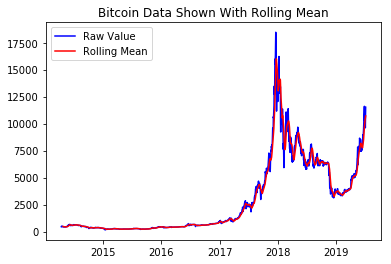

Dicky Fuller rusults on bit data
Test Statistic                   -1.001862
p-   value                        0.752584
#Lags Used                       24.000000
Number of Observations Used    1858.000000
dtype: float64
Critical Value at 5% -> -2.8630968301361275
Do not reject null hypothesis, can not determine that data is stationary.


In [23]:
bit_data = quandl.get("BITSTAMP/USD")

bit_rollmean = bit_data['Low'].rolling(12).mean()
plt.plot(bit_data['Low'], color='blue', label='Raw Value')
plt.plot(bit_rollmean, color='red', label='Rolling Mean')
plt.title('Bitcoin Data Shown With Rolling Mean')
plt.legend(loc='best')
plt.show()

dicky_fuller_results(bit_data['Low'], "Dicky Fuller rusults on bit data")

## Show Log transform examples 

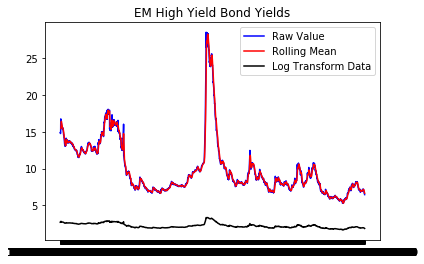

In [26]:
EM_HY_bond_yields['log_yield'] = np.log(EM_HY_bond_yields['yield'])
plt.plot(EM_HY_bond_yields['yield'], color='blue', label='Raw Value')
plt.plot(rollmean, color='red', label='Rolling Mean')
plt.plot(EM_HY_bond_yields['log_yield'], color='black', label='Log Transform Data')
plt.title('EM High Yield Bond Yields')
plt.legend(loc='best')
plt.show()

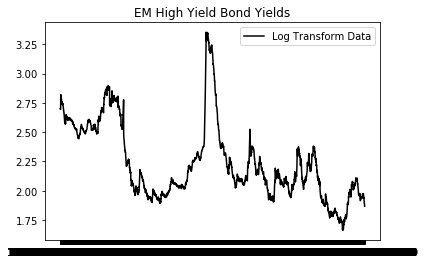

In [28]:
plt.plot(EM_HY_bond_yields['log_yield'], color='black', label='Log Transform Data')
plt.title('EM High Yield Bond Yields')
plt.legend(loc='best')
plt.show()
